# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])
#print(iris.data)
print(iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train)

(120, 4)
(30, 4)
[0 2 1 2 1 1 1 2 1 2 1 2 1 2 2 2 0 1 0 0 0 1 2 1 1 0 0 0 1 2 0 2 1 0 2 2 1
 1 0 1 2 1 0 0 0 0 0 2 2 1 2 0 2 0 0 0 0 2 1 1 0 2 0 2 1 0 0 2 0 0 2 1 0 2
 0 1 2 0 2 0 1 1 2 1 1 1 2 1 2 2 1 2 2 2 0 2 1 1 0 0 1 0 0 2 2 2 0 1 1 2 1
 2 2 0 1 2 2 1 2 1]


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
X=iris.data[iris.target!=2,0:2]
Y=iris.target[iris.target!=2]
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

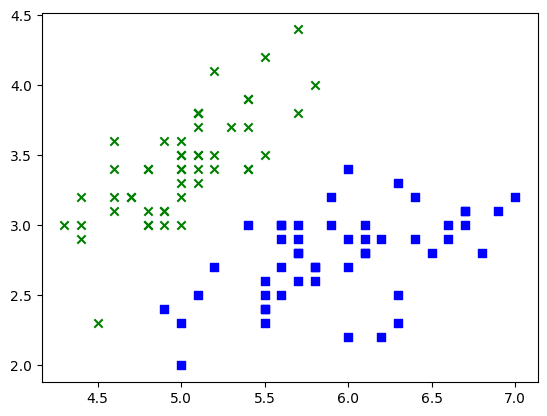

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X[:,0],X[:,1])
plt.scatter(X[Y==0,0],X[Y==0,1],color='green',marker='x')
plt.scatter(X[Y==1,0],X[Y==1,1],color='blue',marker='s')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [ ]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)


[[-0.04623646  0.52123588 -1.00305637 -0.46413464]
 [-0.0057906   0.178388   -0.53908667 -0.29083782]
 [ 0.73448448  0.58101021 -1.98502525 -2.12459172]]
[1.45261957 1.50304831 6.88156449]


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

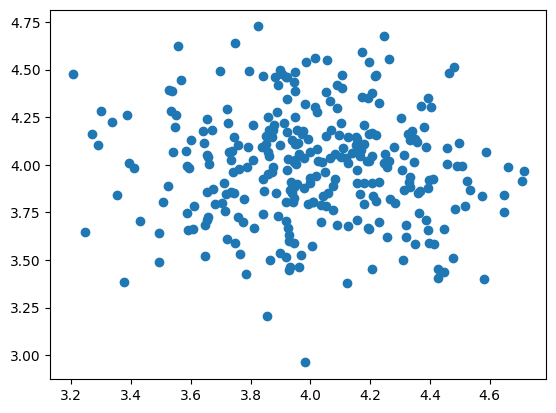

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


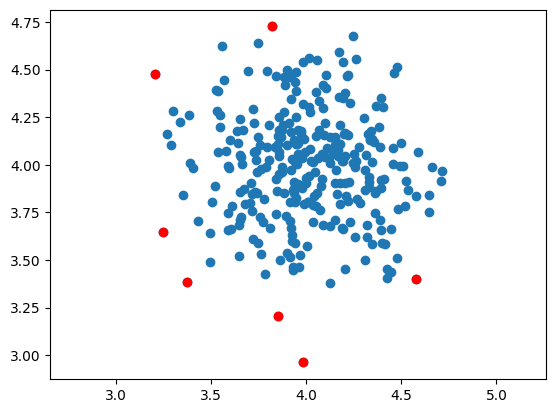

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)

print(pred)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

ValueError: x and y must be the same size

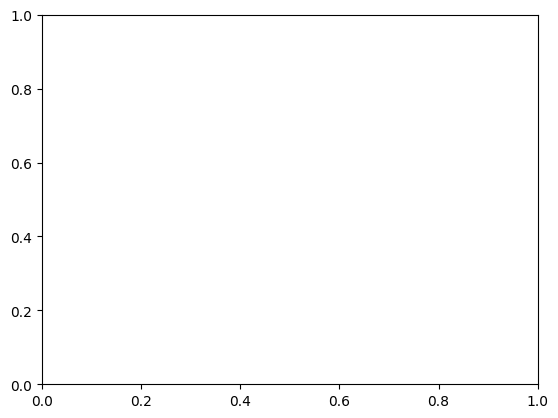

In [ ]:
plt.scatter (X[:,0], x[:,1])
plt.axis("equals")

supvectors2=SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:0])

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored